In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import pandas as pd


In [2]:
data = load_iris()

In [3]:
# Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
#                          n_redundant=5, n_classes=3, random_state=42)

X = data.data
y = data.target

In [4]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
X_train

tensor([[0.0882, 0.6667, 0.0000, 0.0417],
        [0.4118, 1.0000, 0.0877, 0.1250],
        [0.7059, 0.4583, 0.5965, 0.5417],
        [0.1471, 0.5833, 0.1053, 0.0417],
        [0.0294, 0.5000, 0.0526, 0.0417],
        [0.5882, 0.2083, 0.7018, 0.7500],
        [0.6176, 0.5000, 0.6140, 0.5833],
        [0.2647, 0.6250, 0.0877, 0.0417],
        [0.2059, 0.6667, 0.0702, 0.0417],
        [0.2647, 0.8750, 0.0877, 0.0000],
        [0.4412, 0.2917, 0.7193, 0.7500],
        [0.5000, 0.5833, 0.6140, 0.6250],
        [0.7059, 0.4583, 0.6491, 0.5833],
        [0.3235, 0.7917, 0.0526, 0.1250],
        [0.3235, 0.7083, 0.0877, 0.0417],
        [0.3529, 0.1667, 0.4737, 0.3750],
        [0.5882, 0.3333, 0.7193, 0.5833],
        [0.6176, 0.4583, 0.7895, 0.7083],
        [0.6765, 0.4167, 0.5965, 0.5417],
        [0.8529, 0.6667, 0.8947, 1.0000],
        [0.4118, 0.3750, 0.5614, 0.5000],
        [0.9706, 0.4167, 0.9825, 0.8333],
        [0.3824, 0.4167, 0.6140, 0.5833],
        [0.2353, 0.6250, 0.0702, 0

In [7]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], num_classes)
        self.relu = nn.ReLU()    
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
verified_model = ANN(input_size=4, hidden_sizes=[64, 32], num_classes=3)

In [9]:
# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(verified_model.parameters(), lr=0.001)

In [10]:
# Training loop
epochs = 30
for epoch in range(epochs):
    verified_model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = verified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}')

Epoch [5/30], Loss: 1.0656
Epoch [10/30], Loss: 1.0115
Epoch [15/30], Loss: 0.9176
Epoch [20/30], Loss: 0.7740
Epoch [25/30], Loss: 0.6143
Epoch [30/30], Loss: 0.4919


In [11]:
# Evaluation
verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 86.67%
Train Accuracy: 89.17%


In [12]:
activations = {}
def get_activation(name, storage_dict):
    def hook(model, input, output):
        storage_dict[name] = output.detach()
    return hook

verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

In [13]:
calibration_data = X_train[0]

# Get verified activations from original model
verified_model.eval()
with torch.no_grad():
    _ = verified_model(calibration_data)
    target_activations = {k: v.clone() for k, v in activations.items()}

real_activations = target_activations.copy()

# ADVERSARY SETUP

In [14]:
def crack_input(target_output, model, learning_rate=0.005, iterations=10000):
    # Initialize random input (3 features)
    input_tensor = torch.rand(1, 4, requires_grad=True)
    optimizer = torch.optim.Adam([input_tensor], lr=learning_rate)
    
    losses = []
    for i in range(iterations): 
        optimizer.zero_grad()
    
        # Forward pass
        predicted_output = model(input_tensor)
        
        # Compute loss
        loss = F.mse_loss(predicted_output, target_output)
        losses.append(loss.item())
        
        # Backward pass
        loss.backward()
        
        # Update inputs
        optimizer.step()
        
        # Optional: print progress if loss zero hack is successful!!
        if i % 1000 == 0:
            print(f"Iteration {i}, Loss: {loss.item():.6f}")

        if loss.item() < 1e-6:
            print("Loss is very low, stoped early.")
            break
    return input_tensor.detach()

In [15]:
pred_inputs = crack_input(real_activations['fc3'], verified_model, learning_rate=0.001, iterations=100000)

Iteration 0, Loss: 1.499268


C:\Users\hskay\AppData\Local\Temp\ipykernel_10988\3400766572.py:14: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(predicted_output, target_output)


Iteration 1000, Loss: 0.009156
Iteration 2000, Loss: 0.002740
Iteration 3000, Loss: 0.000515
Iteration 4000, Loss: 0.000195
Iteration 5000, Loss: 0.000149
Iteration 6000, Loss: 0.000107
Iteration 7000, Loss: 0.000061
Iteration 8000, Loss: 0.000025
Iteration 9000, Loss: 0.000006
Loss is very low, stoped early.


Layer fc1 - Mean Absolute Difference: 0.221260
Layer fc1 - Max Absolute Difference: 0.611252


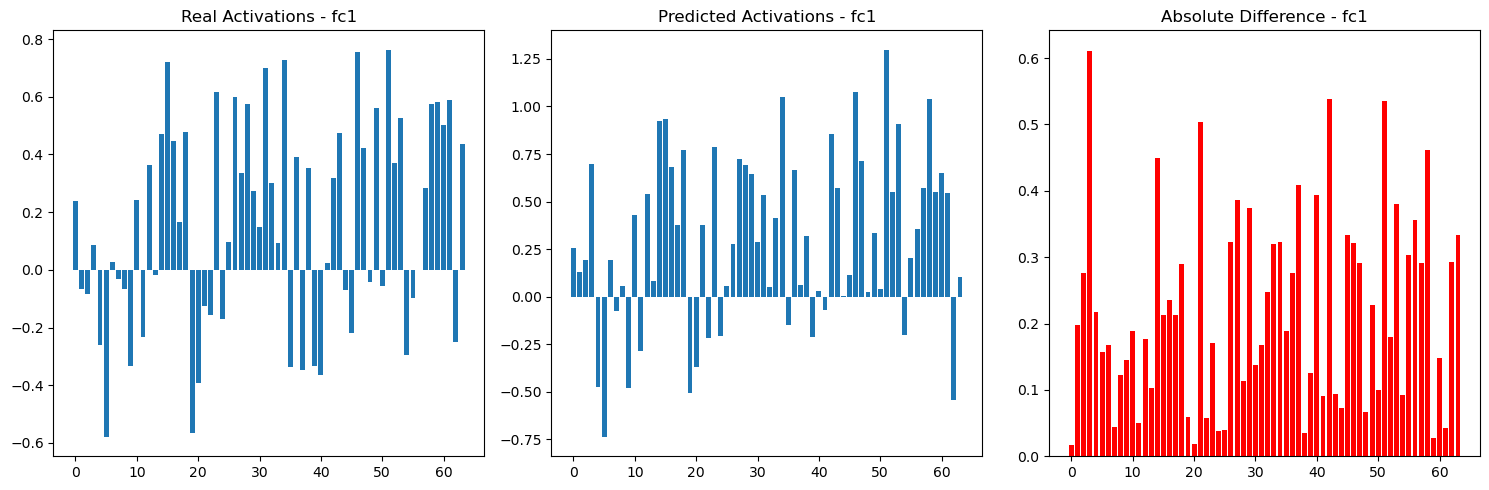

Layer fc2 - Mean Absolute Difference: 0.190517
Layer fc2 - Max Absolute Difference: 0.561143


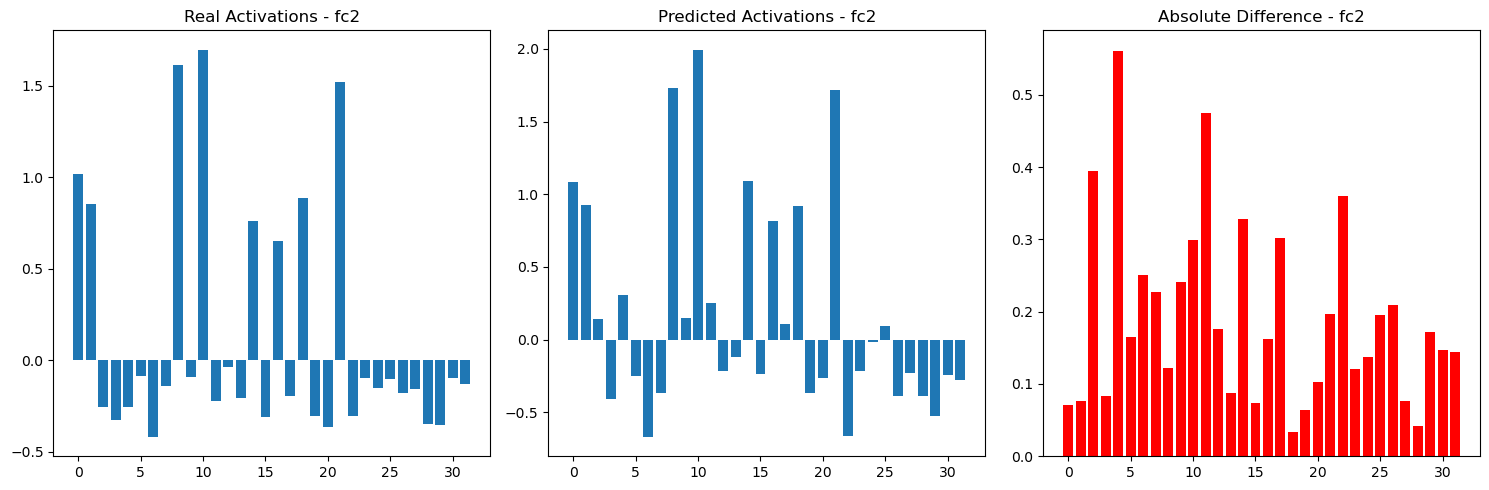

Layer fc3 - Mean Absolute Difference: 0.000996
Layer fc3 - Max Absolute Difference: 0.001096


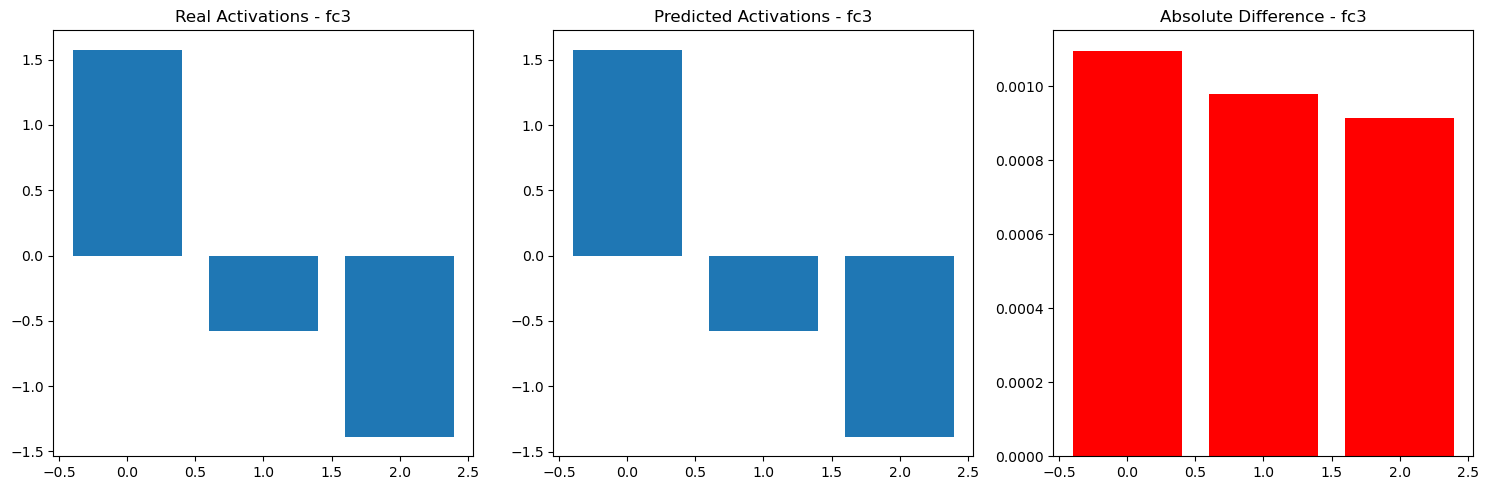

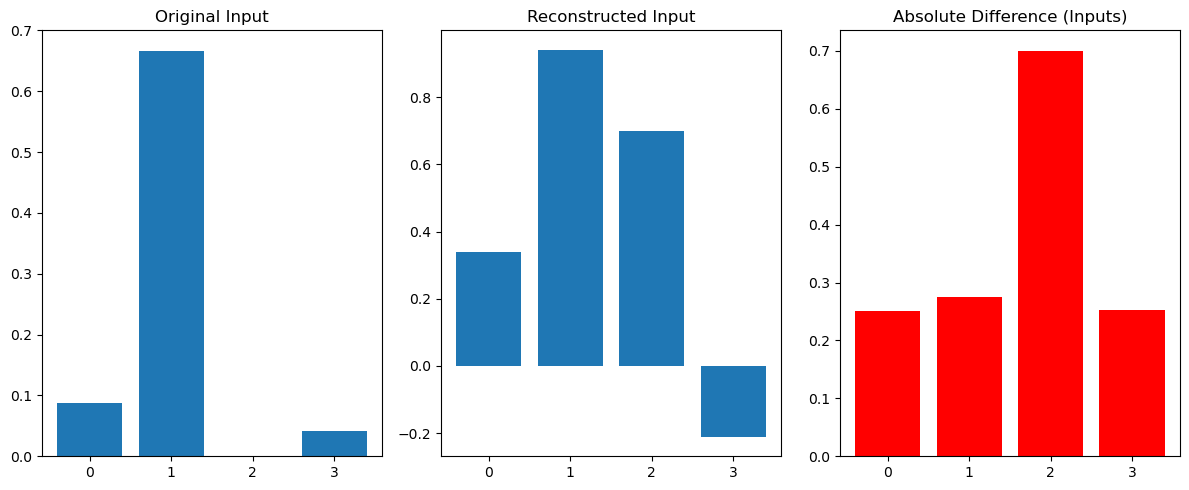

Input - Mean Absolute Difference: 0.369785
Input - Max Absolute Difference: 0.700597


In [16]:
activations = {}
verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

calibration_data = pred_inputs

# Get verified activations from original model
verified_model.eval()
with torch.no_grad():
    _ = verified_model(calibration_data)
    pred_activations = {k: v.clone() for k, v in activations.items()}

# Compare and visualize the activations using absolute difference
for layer in real_activations.keys():
    # Calculate mean absolute error between real and predicted activations
    abs_diff = torch.abs(real_activations[layer] - pred_activations[layer])
    mean_abs_diff = abs_diff.mean().item()
    max_abs_diff = abs_diff.max().item()
    
    print(f"Layer {layer} - Mean Absolute Difference: {mean_abs_diff:.6f}")
    print(f"Layer {layer} - Max Absolute Difference: {max_abs_diff:.6f}")
    
    # Create visualization
    plt.figure(figsize=(15, 5))
    
    # Plot real activations
    plt.subplot(1, 3, 1)
    plt.title(f"Real Activations - {layer}")
    plt.bar(range(len(real_activations[layer].flatten())), 
            real_activations[layer].flatten().numpy())
    
    # Plot predicted activations
    plt.subplot(1, 3, 2)
    plt.title(f"Predicted Activations - {layer}")
    plt.bar(range(len(pred_activations[layer].flatten())), 
            pred_activations[layer].flatten().numpy())
    
    # Plot absolute differences
    plt.subplot(1, 3, 3)
    plt.title(f"Absolute Difference - {layer}")
    plt.bar(range(len(abs_diff.flatten())), 
            abs_diff.flatten().numpy(),
            color='red')
    
    plt.tight_layout()
    plt.savefig(f"activation_comparison_{layer}_first_input3.png")
    plt.show()

# Also compare the original input with the reconstructed input
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Original Input")
plt.bar(range(len(X_train[0])), X_train[0].numpy())

plt.subplot(1, 3, 2)
plt.title("Reconstructed Input")
plt.bar(range(len(pred_inputs.flatten())), pred_inputs.flatten().numpy())

# Show absolute difference between inputs
plt.subplot(1, 3, 3)
plt.title("Absolute Difference (Inputs)")
input_abs_diff = torch.abs(X_train[0] - pred_inputs.flatten())
plt.bar(range(len(input_abs_diff)), input_abs_diff.numpy(), color='red')

plt.tight_layout()
plt.savefig(f"input_comparison_first_input2.png")
plt.show()

# Print summary statistics for inputs
mean_input_diff = input_abs_diff.mean().item()
max_input_diff = input_abs_diff.max().item()
print(f"Input - Mean Absolute Difference: {mean_input_diff:.6f}")
print(f"Input - Max Absolute Difference: {max_input_diff:.6f}")

# MULTIPLE INPUT with N ROUND

In [17]:
ROUND = 3
N_INPUTS = 50
results = pd.DataFrame(columns=[
    'input_id', 'round_id', 
    'fc1_min_abs_diff', 'fc1_max_abs_diff', 'fc1_mean_abs_diff',
    'fc2_min_abs_diff', 'fc2_max_abs_diff', 'fc2_mean_abs_diff',
    'fc3_min_abs_diff', 'fc3_max_abs_diff', 'fc3_mean_abs_diff',
    'real_input', "pred_input"
])
for i in range(N_INPUTS):
    print(f"Input {i+1}")
    for j in range(ROUND):
        print(f"Round {j+1}")

        # Registering hooks to capture activations
        activations = {}
        verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
        verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
        verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

        calibration_data = X_train[i]

        # Get verified activations from original model
        verified_model.eval()
        with torch.no_grad():
            _ = verified_model(calibration_data)
            target_activations = {k: v.clone() for k, v in activations.items()}

        real_activations = target_activations.copy()


        # ADVERSARIAL INPUT GENERATION
        pred_inputs = crack_input(real_activations['fc3'], verified_model, learning_rate=0.005, iterations=10000)

        # Registering hooks to capture activations
        activations = {}
        verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
        verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
        verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

        calibration_data = pred_inputs

        # ACTIVATIONS that ADVERSARIAL INPUT GENERATED
        verified_model.eval()
        with torch.no_grad():
            _ = verified_model(calibration_data)
            pred_activations = {k: v.clone() for k, v in activations.items()}

        round_results = {'input_id': i+1, 'round_id': j+1}
        
        # Compare and visualize the activations using absolute difference
        for layer in real_activations.keys():

            # Calculate mean absolute error between real and predicted activations
            abs_diff = torch.abs(real_activations[layer] - pred_activations[layer])
            mean_abs_diff = abs_diff.mean().item()
            max_abs_diff = abs_diff.max().item()
            min_abs_diff = abs_diff.min().item()

            # Store in results dictionary
            round_results[f'{layer}_min_abs_diff'] = min_abs_diff
            round_results[f'{layer}_max_abs_diff'] = max_abs_diff
            round_results[f'{layer}_mean_abs_diff'] = mean_abs_diff

        # Append results to DataFrame
        round_results['real_input'] = X_train[i].flatten().numpy().tolist()
        round_results['pred_input'] = pred_inputs.flatten().numpy().tolist()
        results = pd.concat([results, pd.DataFrame([round_results])], ignore_index=True)
        
            
results.to_csv('activation_diff_results2.csv', index=False)




Input 1
Round 1
Iteration 0, Loss: 1.405949


C:\Users\hskay\AppData\Local\Temp\ipykernel_10988\3400766572.py:14: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(predicted_output, target_output)


Iteration 1000, Loss: 0.001728
Iteration 2000, Loss: 0.000171
Iteration 3000, Loss: 0.000061
Iteration 4000, Loss: 0.000019
Iteration 5000, Loss: 0.000003
Loss is very low, stoped early.
Round 2
Iteration 0, Loss: 4.382454


C:\Users\hskay\AppData\Local\Temp\ipykernel_10988\3219841291.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([round_results])], ignore_index=True)


Iteration 1000, Loss: 0.000456
Iteration 2000, Loss: 0.000324
Iteration 3000, Loss: 0.000262
Iteration 4000, Loss: 0.000206
Iteration 5000, Loss: 0.000151
Iteration 6000, Loss: 0.000092
Iteration 7000, Loss: 0.000040
Iteration 8000, Loss: 0.000012
Iteration 9000, Loss: 0.000002
Loss is very low, stoped early.
Round 3
Iteration 0, Loss: 2.736805
Iteration 1000, Loss: 0.002187
Iteration 2000, Loss: 0.000119
Iteration 3000, Loss: 0.000100
Iteration 4000, Loss: 0.000076
Iteration 5000, Loss: 0.000049
Iteration 6000, Loss: 0.000023
Iteration 7000, Loss: 0.000007
Loss is very low, stoped early.
Input 2
Round 1
Iteration 0, Loss: 4.965066
Iteration 1000, Loss: 0.002509
Iteration 2000, Loss: 0.001992
Iteration 3000, Loss: 0.001718
Iteration 4000, Loss: 0.001342
Iteration 5000, Loss: 0.000882
Iteration 6000, Loss: 0.000344
Iteration 7000, Loss: 0.000048
Iteration 8000, Loss: 0.000005
Loss is very low, stoped early.
Round 2
Iteration 0, Loss: 6.575216
Iteration 1000, Loss: 0.002699
Iteration 200

C:\Users\hskay\AppData\Local\Temp\ipykernel_10988\2931628124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=flat_data, palette=colors)
C:\Users\hskay\AppData\Local\Temp\ipykernel_10988\2931628124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=flat_data, palette=colors)
C:\Users\hskay\AppData\Local\Temp\ipykernel_10988\2931628124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=flat_data, palette=colors)


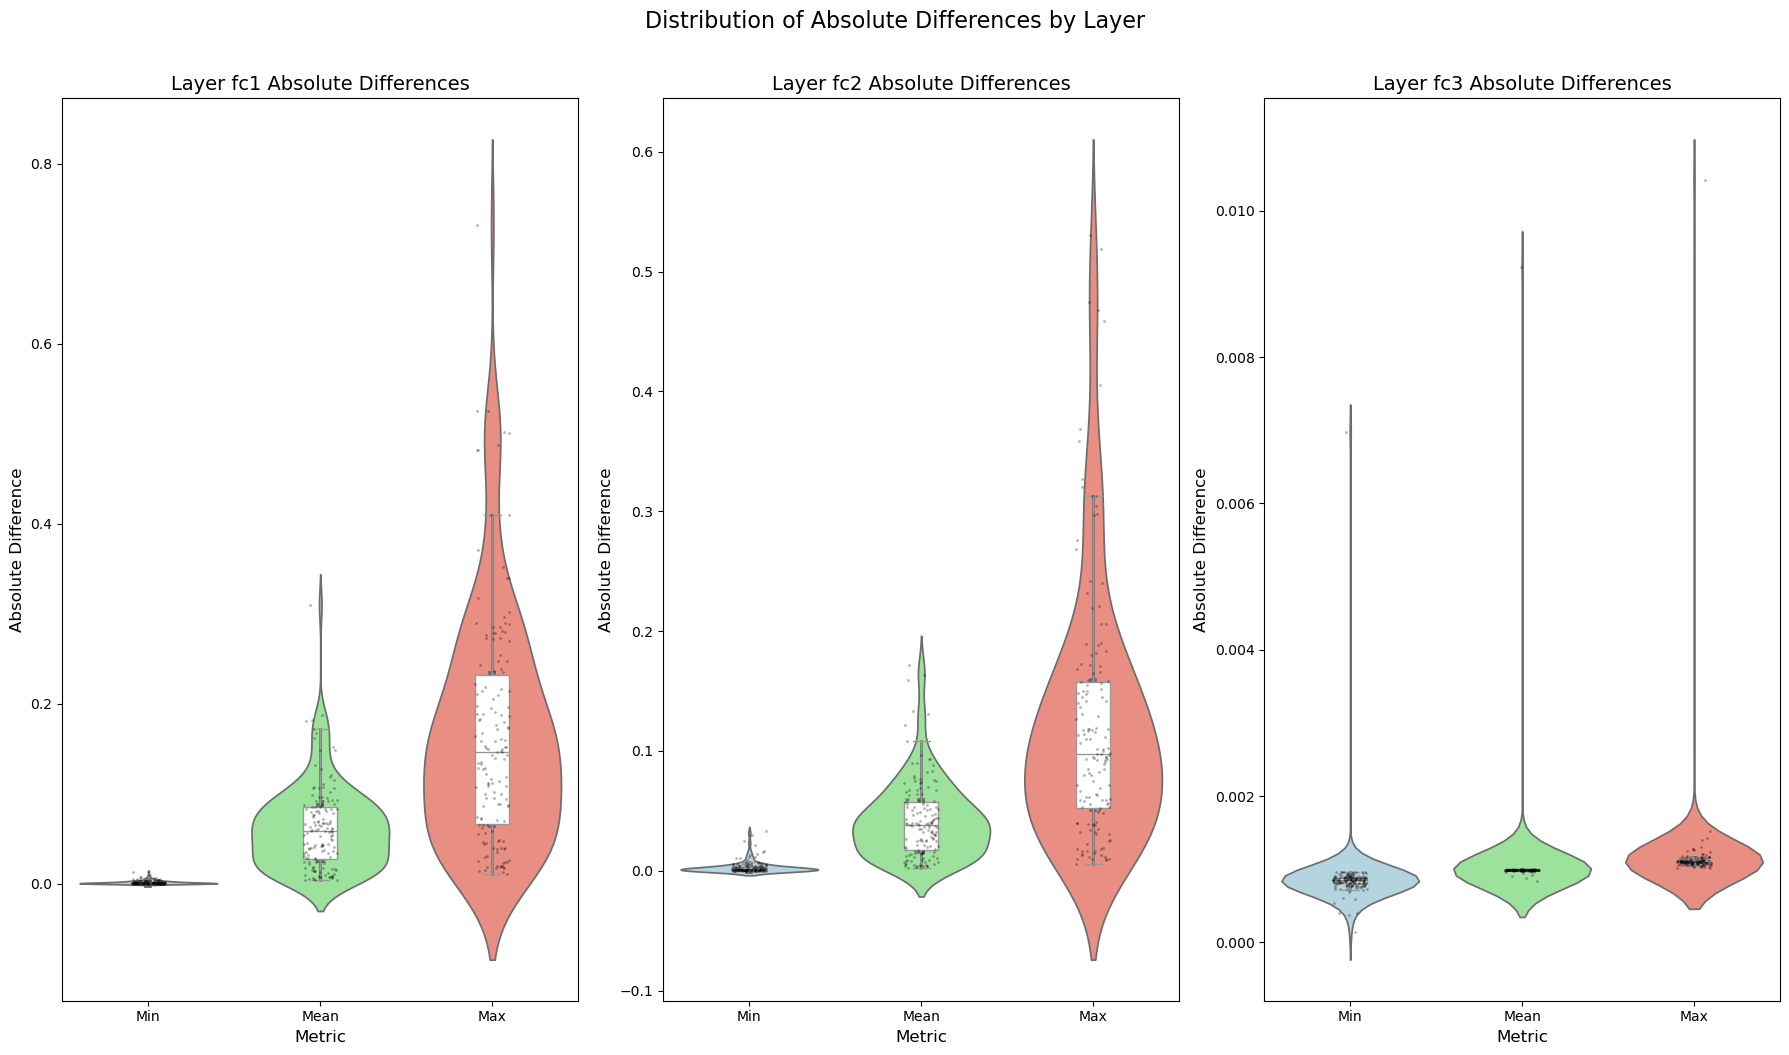

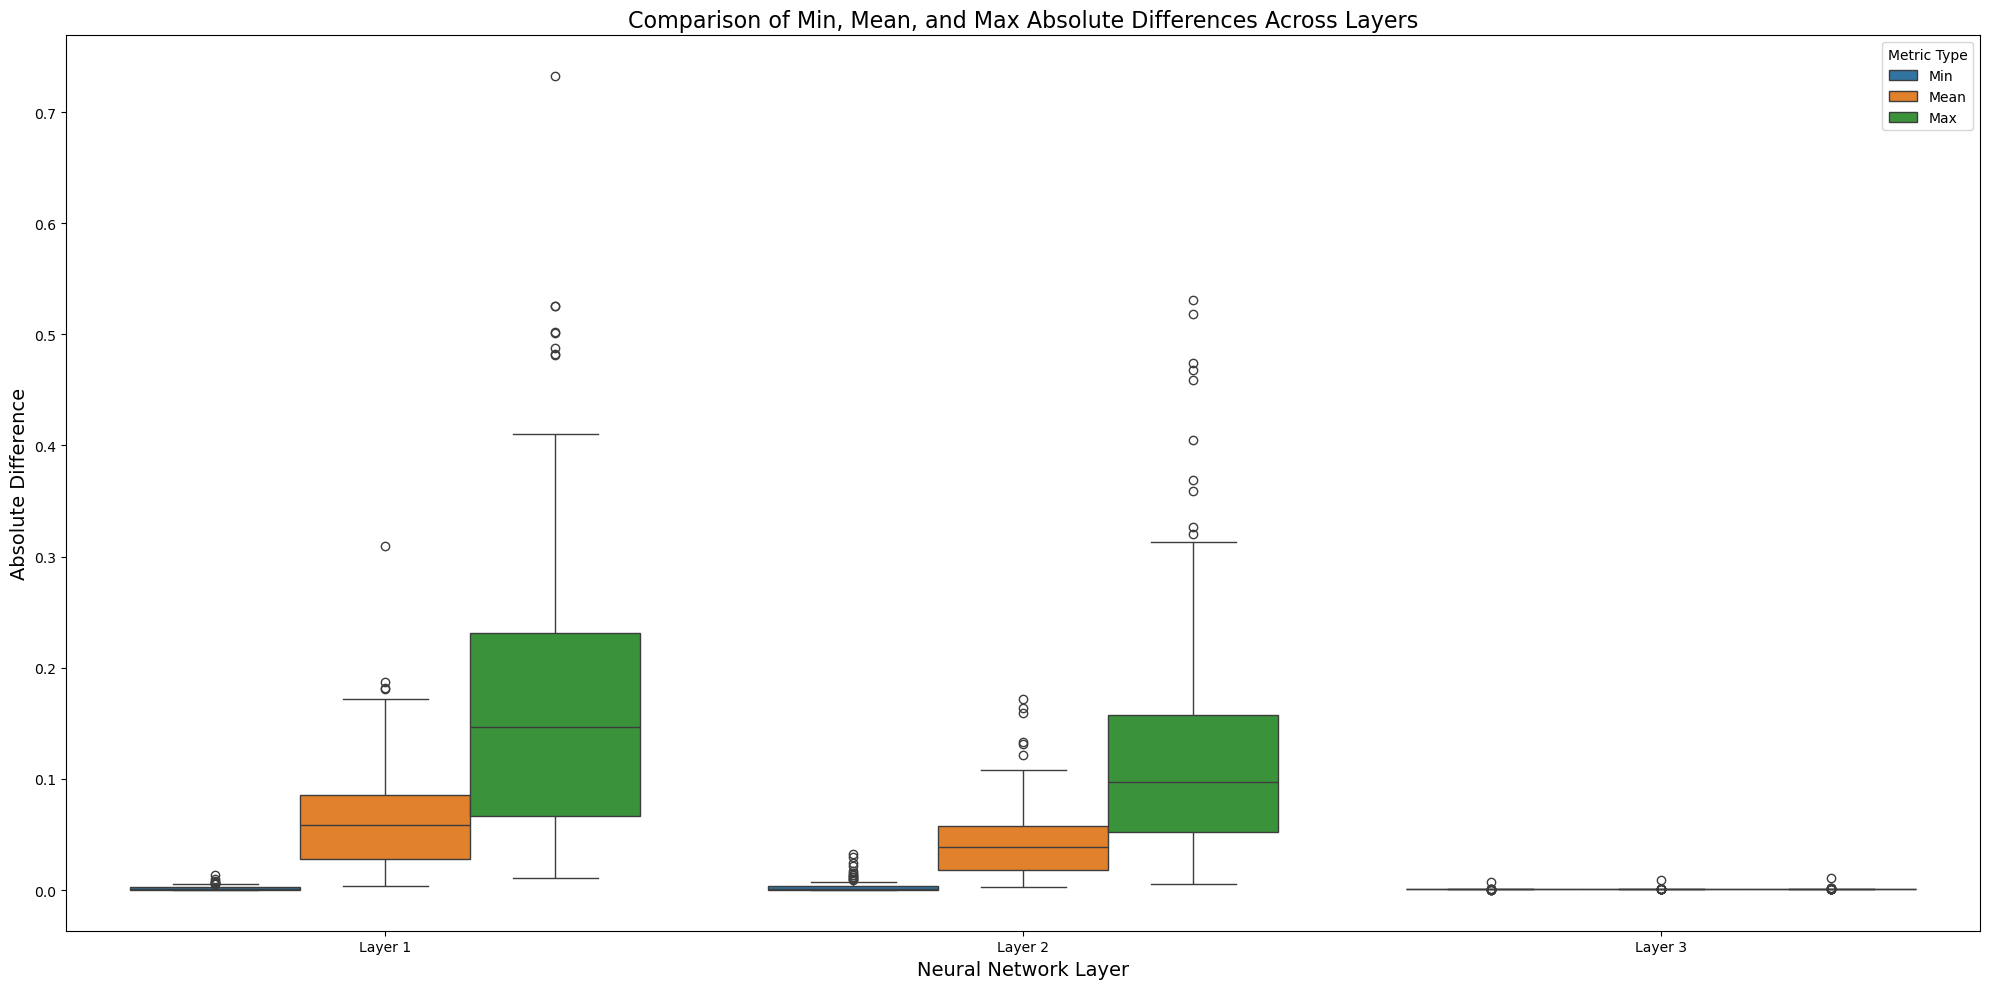

In [18]:

results = pd.DataFrame(pd.read_csv('activation_diff_results2.csv'))

# Create figure for distribution plots
plt.figure(figsize=(18, 10))

# Define the layers and metrics
layers = ['fc1', 'fc2', 'fc3']
metrics = ['min_abs_diff', 'mean_abs_diff', 'max_abs_diff']
metric_labels = ['Min', 'Mean', 'Max']
colors = ['lightblue', 'lightgreen', 'salmon']

# Create combined subplot for each layer
for i, layer in enumerate(layers, 1):
    plt.subplot(1, 3, i)
    
    # Prepare data for this layer
    data = []
    labels = []
    
    for metric, label in zip(metrics, metric_labels):
        column = f'{layer}_{metric}'
        data.append(results[column].values)
        labels.extend([label] * len(results[column]))
    
    # Flatten the data for plotting
    flat_data = np.concatenate(data)
    
    # Create category labels
    categories = np.repeat(metric_labels, len(results))
    
    # Create violin plot
    sns.violinplot(x=categories, y=flat_data, palette=colors)
    
    # Add box plot inside for more detail
    sns.boxplot(x=categories, y=flat_data, width=0.2, 
                color='white', showfliers=False, zorder=2)
    
    # Add individual points with jitter for better visibility
    sns.stripplot(x=categories, y=flat_data, size=2, 
                 color='black', alpha=0.3, jitter=True)
    
    # Set plot title and labels
    plt.title(f'Layer {layer} Absolute Differences', fontsize=14)
    plt.xlabel('Metric', fontsize=12)
    plt.ylabel('Absolute Difference', fontsize=12)
    
    # Set y-axis to log scale if the range is very wide
    if results[f'{layer}_max_abs_diff'].max() / results[f'{layer}_min_abs_diff'].min() > 100:
        #plt.yscale('log')
        plt.ylabel('Absolute Difference')# (log scale)', fontsize=12)

plt.tight_layout()
plt.suptitle('Distribution of Absolute Differences by Layer', fontsize=16, y=1.05)
plt.savefig('layer_differences_distribution3.png', bbox_inches='tight')
plt.show()

# Create a second figure with all metrics together for comparison
plt.figure(figsize=(20, 10))

# Prepare data for combined plot
all_data = []
all_labels = []
all_layer_labels = []

for layer in layers:
    for metric in metrics:
        column = f'{layer}_{metric}'
        all_data.append(results[column].values)
        all_labels.extend([f"{metric.split('_')[0].capitalize()}"] * len(results[column]))
        all_layer_labels.extend([f"Layer {layer.replace('fc', '')}"] * len(results[column]))

# Convert to arrays
all_data_flat = np.concatenate(all_data)
all_labels = np.array(all_labels)
all_layer_labels = np.array(all_layer_labels)

# Create DataFrame for seaborn
plot_df = pd.DataFrame({
    'Metric': all_labels,
    'Layer': all_layer_labels,
    'Value': all_data_flat
})

# Create the combined plot
sns.boxplot(x='Layer', y='Value', hue='Metric', data=plot_df)
plt.title('Comparison of Min, Mean, and Max Absolute Differences Across Layers', fontsize=16)
plt.xlabel('Neural Network Layer', fontsize=14)
plt.ylabel('Absolute Difference', fontsize=14)
plt.legend(title='Metric Type')

# Check if log scale is needed
if plot_df['Value'].max() / plot_df['Value'].min() > 100:
    #plt.yscale('log')
    plt.ylabel('Absolute Difference')# (log scale)', fontsize=14)

plt.tight_layout()
plt.savefig('combined_layer_differences3.png')
plt.show()


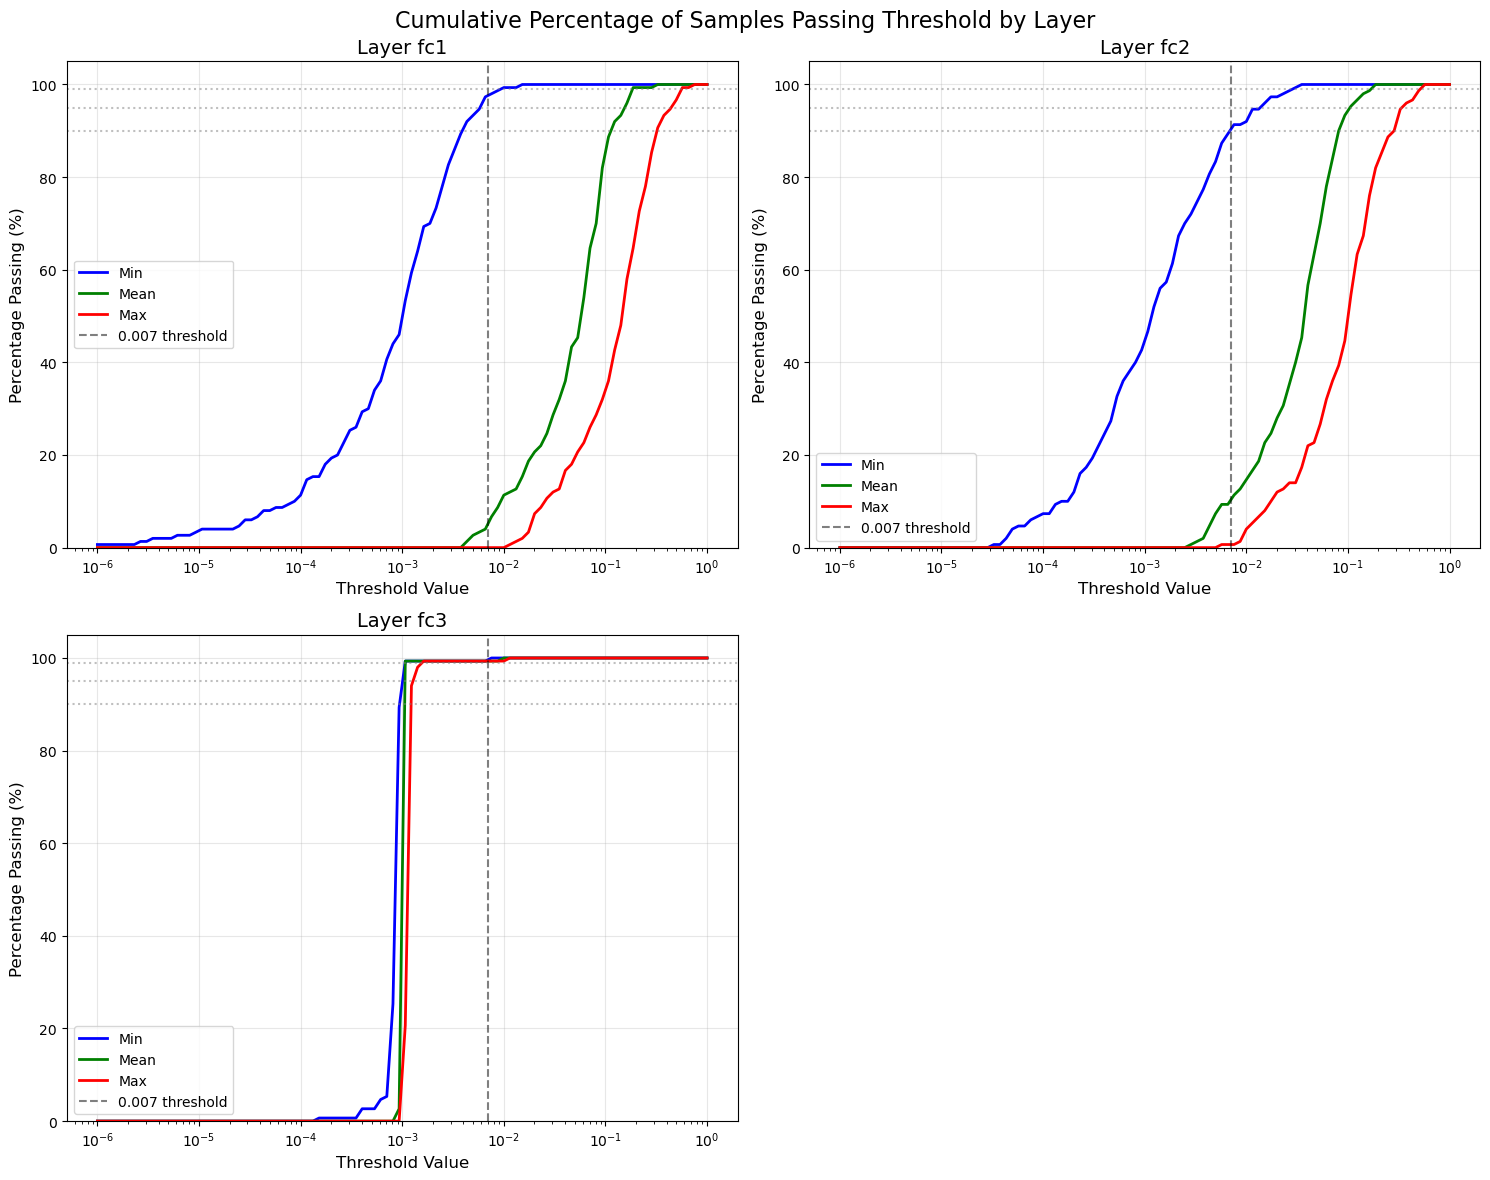


Threshold Analysis Table:
Layer  Threshold Min Pass % Mean Pass % Max Pass %
  fc1      0.001      50.7%        0.0%       0.0%
  fc1      0.005      93.3%        2.7%       0.0%
  fc1      0.007      97.3%        4.7%       0.0%
  fc1      0.010      99.3%       11.3%       0.0%
  fc1      0.050     100.0%       44.7%      20.7%
  fc1      0.100     100.0%       85.3%      35.3%
  fc2      0.001      45.3%        0.0%       0.0%
  fc2      0.005      83.3%        7.3%       0.0%
  fc2      0.007      90.0%       10.0%       0.7%
  fc2      0.010      92.0%       14.7%       4.0%
  fc2      0.050     100.0%       66.0%      24.0%
  fc2      0.100     100.0%       95.3%      52.0%
  fc3      0.001      99.3%       99.3%       0.0%
  fc3      0.005      99.3%       99.3%      99.3%
  fc3      0.007     100.0%       99.3%      99.3%
  fc3      0.010     100.0%      100.0%      99.3%
  fc3      0.050     100.0%      100.0%     100.0%
  fc3      0.100     100.0%      100.0%     100.0%


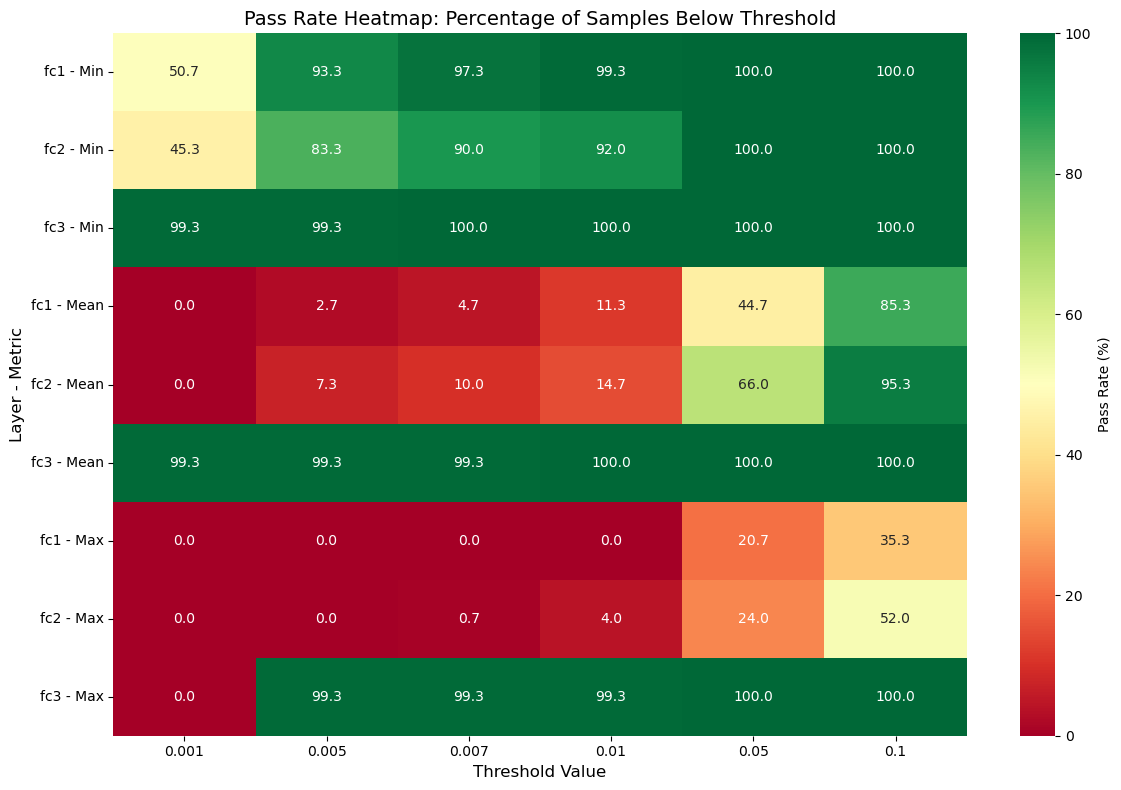

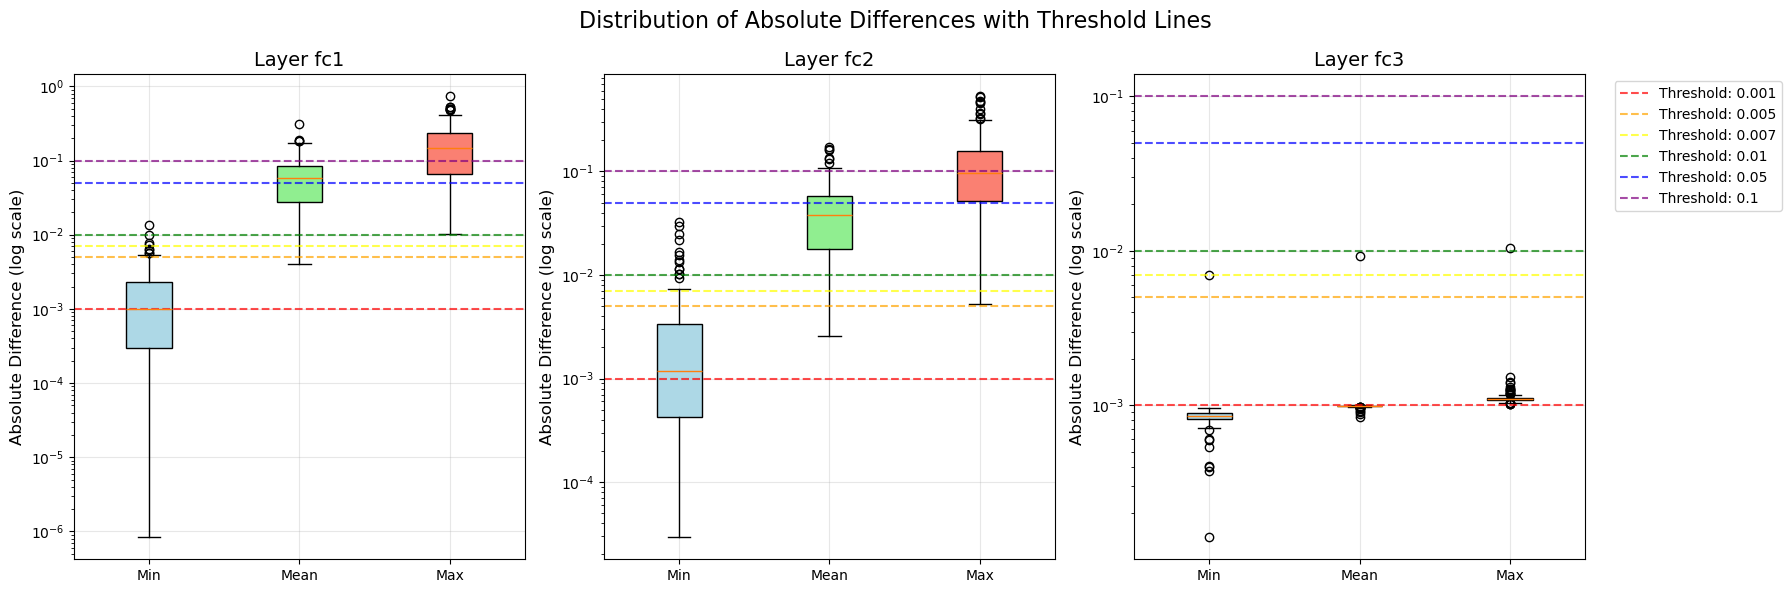


Summary Statistics for Threshold Selection:

Layer fc1:
----------------------------------------

Min Metric:
  Threshold for 90% pass rate: 0.003794
  Threshold for 95% pass rate: 0.005530
  Threshold for 99% pass rate: 0.008846
  Threshold for 99.9% pass rate: 0.012832

Mean Metric:
  Threshold for 90% pass rate: 0.111443
  Threshold for 95% pass rate: 0.150401
  Threshold for 99% pass rate: 0.184708
  Threshold for 99.9% pass rate: 0.291419

Max Metric:
  Threshold for 90% pass rate: 0.303228
  Threshold for 95% pass rate: 0.449485
  Threshold for 99% pass rate: 0.525419
  Threshold for 99.9% pass rate: 0.701564

Layer fc2:
----------------------------------------

Min Metric:
  Threshold for 90% pass rate: 0.006916
  Threshold for 95% pass rate: 0.012432
  Threshold for 99% pass rate: 0.027392
  Threshold for 99.9% pass rate: 0.032412

Mean Metric:
  Threshold for 90% pass rate: 0.079810
  Threshold for 95% pass rate: 0.095370
  Threshold for 99% pass rate: 0.161597
  Threshold fo

In [19]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the results
results = pd.read_csv('activation_diff_results2.csv')

# Define threshold values to test
thresholds = np.logspace(-6, 0, 100)  # From 1e-6 to 1 (0.000001 to 1)

# Create figure for cumulative distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cumulative Percentage of Samples Passing Threshold by Layer', fontsize=16)

layers = ['fc1', 'fc2', 'fc3']
metrics = ['min_abs_diff', 'mean_abs_diff', 'max_abs_diff']
colors = {'min_abs_diff': 'blue', 'mean_abs_diff': 'green', 'max_abs_diff': 'red'}

# Plot for each layer
for idx, layer in enumerate(layers):
    ax = axes[idx//2, idx%2]
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate percentage passing each threshold
        percentages = []
        for threshold in thresholds:
            passing = np.sum(values <= threshold) / len(values) * 100
            percentages.append(passing)
        
        # Plot cumulative distribution
        ax.semilogx(thresholds, percentages, 
                   label=metric.replace('_abs_diff', '').capitalize(),
                   color=colors[metric], linewidth=2)
    
    # Add reference lines for common thresholds
    ax.axvline(x=0.007, color='black', linestyle='--', alpha=0.5, label='0.007 threshold')
    ax.axhline(y=90, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=95, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=99, color='gray', linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Threshold Value', fontsize=12)
    ax.set_ylabel('Percentage Passing (%)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 105)

# Remove empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('cumulative_threshold_distribution3.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create a detailed threshold analysis table
threshold_values = [0.001, 0.005, 0.007, 0.01, 0.05, 0.1]
analysis_results = []

for layer in layers:
    for threshold in threshold_values:
        row = {'Layer': layer, 'Threshold': threshold}
        
        for metric in metrics:
            column = f'{layer}_{metric}'
            values = results[column].values
            passing_percentage = np.sum(values <= threshold) / len(values) * 100
            row[f'{metric.replace("_abs_diff", "").capitalize()} Pass %'] = f'{passing_percentage:.1f}%'
        
        analysis_results.append(row)

# Create DataFrame and display
threshold_df = pd.DataFrame(analysis_results)
print("\nThreshold Analysis Table:")
print("="*80)
print(threshold_df.to_string(index=False))

# Save to CSV
threshold_df.to_csv('threshold_analysis.csv', index=False)

# %%
# Create a heatmap showing pass rates for different thresholds and layers
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = []
heatmap_labels = []

for metric in metrics:
    metric_data = []
    for layer in layers:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate pass rates for each threshold
        pass_rates = []
        for threshold in threshold_values:
            passing = np.sum(values <= threshold) / len(values) * 100
            pass_rates.append(passing)
        
        metric_data.append(pass_rates)
    
    heatmap_data.extend(metric_data)
    heatmap_labels.extend([f'{layer} - {metric.replace("_abs_diff", "").capitalize()}' 
                          for layer in layers])

# Create heatmap
heatmap_array = np.array(heatmap_data)
sns.heatmap(heatmap_array, 
            xticklabels=[f'{t}' for t in threshold_values],
            yticklabels=heatmap_labels,
            annot=True, 
            fmt='.1f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Pass Rate (%)'},
            vmin=0, vmax=100)

plt.title('Pass Rate Heatmap: Percentage of Samples Below Threshold', fontsize=14)
plt.xlabel('Threshold Value', fontsize=12)
plt.ylabel('Layer - Metric', fontsize=12)
plt.tight_layout()
plt.savefig('threshold_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create box plots showing the distribution of differences for each layer
# with threshold lines overlaid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Absolute Differences with Threshold Lines', fontsize=16)

for idx, layer in enumerate(layers):
    ax = axes[idx]
    
    # Prepare data for box plot
    data_to_plot = []
    labels_to_plot = []
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        data_to_plot.append(results[column].values)
        labels_to_plot.append(metric.replace('_abs_diff', '').capitalize())
    
    # Create box plot
    bp = ax.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)
    
    # Color the boxes
    colors_list = ['lightblue', 'lightgreen', 'salmon']
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
    
    # Add threshold lines
    threshold_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    for thresh, color in zip(threshold_values, threshold_colors):
        ax.axhline(y=thresh, color=color, linestyle='--', alpha=0.7, 
                  label=f'Threshold: {thresh}')
    
    ax.set_yscale('log')
    ax.set_ylabel('Absolute Difference (log scale)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Only show legend on the last subplot
    if idx == 2:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('distribution_with_thresholds.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Summary statistics for threshold selection
print("\nSummary Statistics for Threshold Selection:")
print("="*80)

for layer in layers:
    print(f"\nLayer {layer}:")
    print("-"*40)
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Find threshold for different pass rates
        pass_rates = [90, 95, 99, 99.9]
        print(f"\n{metric.replace('_abs_diff', '').capitalize()} Metric:")
        
        for rate in pass_rates:
            threshold_for_rate = np.percentile(values, rate)
            print(f"  Threshold for {rate}% pass rate: {threshold_for_rate:.6f}")


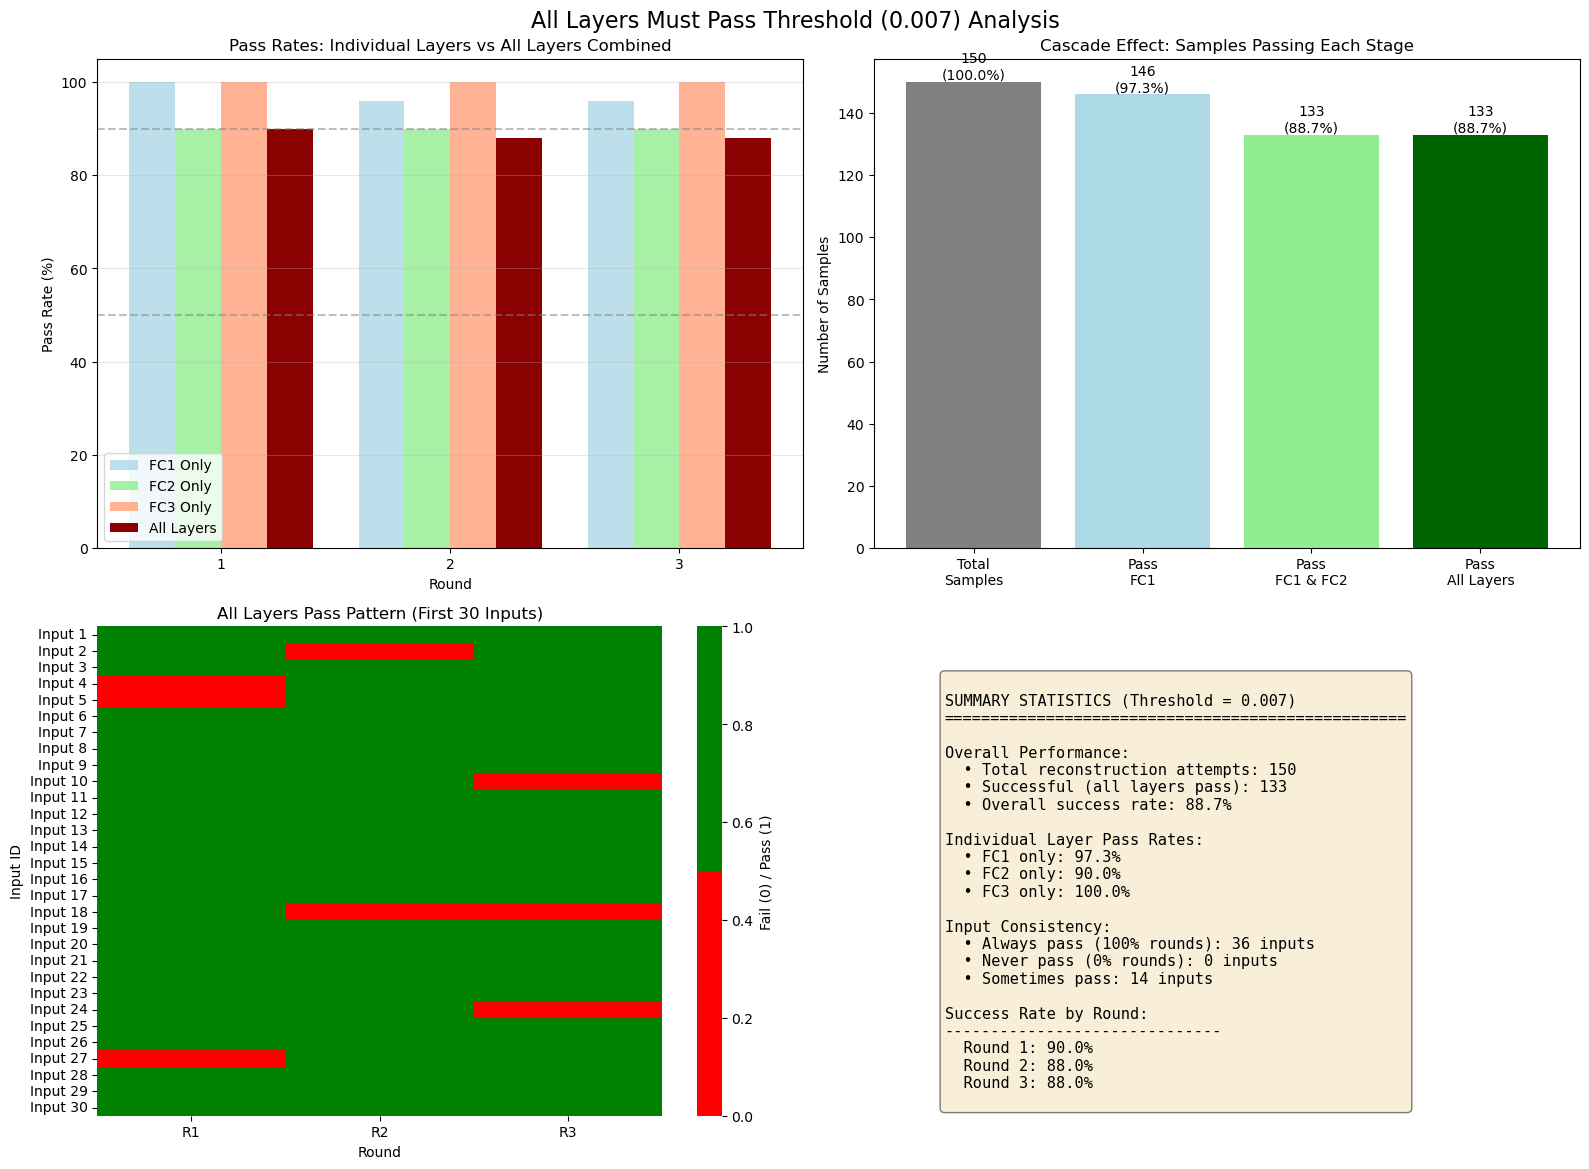

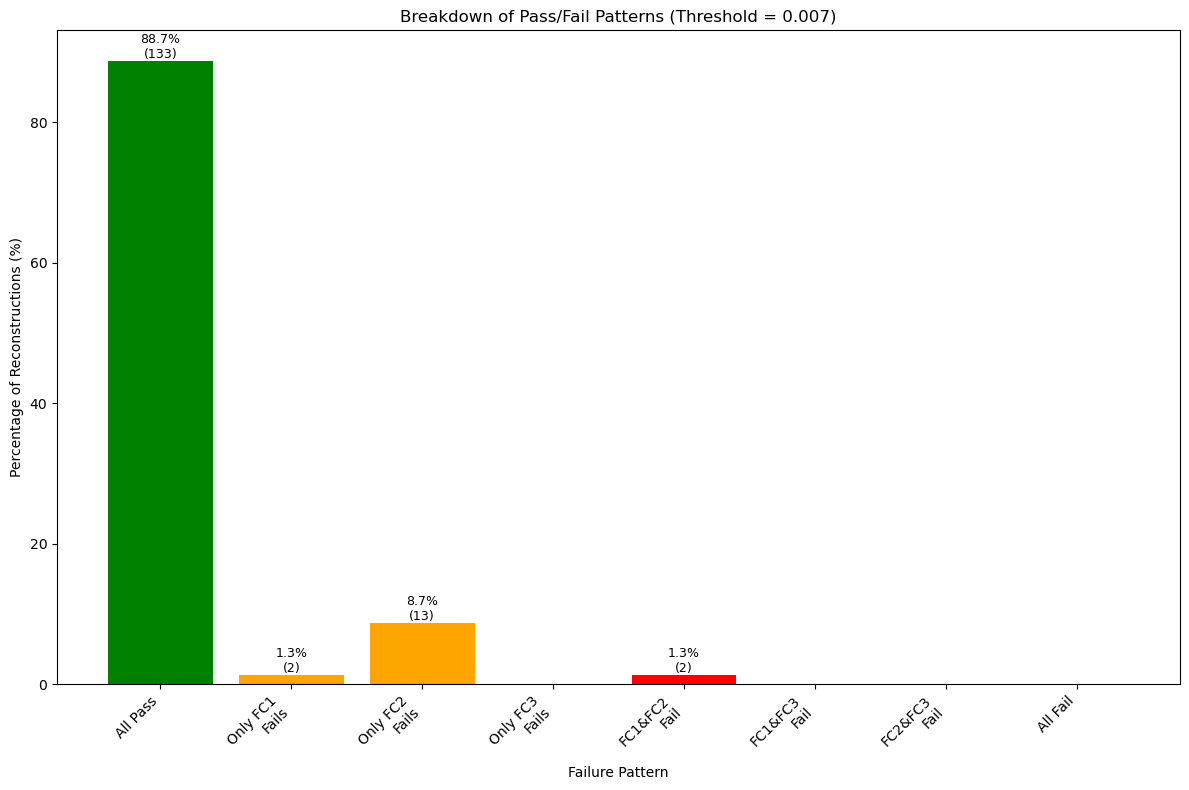


Inputs that ALWAYS pass all layers:
Input 1: FC1=0.003014, FC2=0.001170, FC3=0.000830
Input 3: FC1=0.001384, FC2=0.001959, FC3=0.000834
Input 6: FC1=0.000829, FC2=0.002286, FC3=0.000879
Input 7: FC1=0.002195, FC2=0.001390, FC3=0.000854
Input 8: FC1=0.001716, FC2=0.002113, FC3=0.000540
Input 9: FC1=0.002514, FC2=0.001359, FC3=0.000788
Input 11: FC1=0.000488, FC2=0.000283, FC3=0.000809
Input 12: FC1=0.000074, FC2=0.001264, FC3=0.000842
Input 13: FC1=0.001354, FC2=0.001849, FC3=0.000782
Input 14: FC1=0.002082, FC2=0.004224, FC3=0.000785
Input 15: FC1=0.000785, FC2=0.002557, FC3=0.000924
Input 16: FC1=0.000585, FC2=0.001043, FC3=0.000963
Input 17: FC1=0.000682, FC2=0.003826, FC3=0.000769
Input 19: FC1=0.001834, FC2=0.000825, FC3=0.000780
Input 20: FC1=0.001041, FC2=0.000493, FC3=0.000812
Input 21: FC1=0.004546, FC2=0.002041, FC3=0.000877
Input 22: FC1=0.000642, FC2=0.000350, FC3=0.000892
Input 23: FC1=0.002620, FC2=0.001456, FC3=0.000619
Input 25: FC1=0.001375, FC2=0.001711, FC3=0.000877


In [ ]:
# # %%
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Load the results
# results = pd.read_csv('activation_diff_results2.csv')

# # Define threshold
# THRESHOLD = 0.007

# # %%
# # Calculate which reconstructions pass ALL layers simultaneously
# results['fc1_pass'] = results['fc1_min_abs_diff'] <= THRESHOLD
# results['fc2_pass'] = results['fc2_min_abs_diff'] <= THRESHOLD
# results['fc3_pass'] = results['fc3_min_abs_diff'] <= THRESHOLD

# # All layers must pass (using minimum values only as per requirement)
# results['all_layers_pass'] = results['fc1_pass'] & results['fc2_pass'] & results['fc3_pass']

# # %%
# # Create main visualization
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# fig.suptitle(f'All Layers Must Pass Threshold ({THRESHOLD}) Analysis', fontsize=16)

# # Plot 1: Pass rate by round - showing individual layers and all combined
# ax1 = axes[0, 0]
# round_stats = []
# for round_id in sorted(results['round_id'].unique()):
#     round_data = results[results['round_id'] == round_id]
#     stats = {
#         'Round': round_id,
#         'FC1 Only': (round_data['fc1_pass'].sum() / len(round_data)) * 100,
#         'FC2 Only': (round_data['fc2_pass'].sum() / len(round_data)) * 100,
#         'FC3 Only': (round_data['fc3_pass'].sum() / len(round_data)) * 100,
#         'All Layers': (round_data['all_layers_pass'].sum() / len(round_data)) * 100
#     }
#     round_stats.append(stats)

# round_df = pd.DataFrame(round_stats)
# x = np.arange(len(round_df))
# width = 0.2

# colors = ['lightblue', 'lightgreen', 'lightsalmon', 'darkred']
# labels = ['FC1 Only', 'FC2 Only', 'FC3 Only', 'All Layers']

# for i, (label, color) in enumerate(zip(labels, colors)):
#     offset = (i - 1.5) * width
#     ax1.bar(x + offset, round_df[label], width, label=label, color=color, 
#             alpha=0.8 if label != 'All Layers' else 1.0)

# ax1.set_xlabel('Round')
# ax1.set_ylabel('Pass Rate (%)')
# ax1.set_title('Pass Rates: Individual Layers vs All Layers Combined')
# ax1.set_xticks(x)
# ax1.set_xticklabels(round_df['Round'])
# ax1.legend()
# ax1.grid(True, alpha=0.3, axis='y')

# # Add horizontal line at key percentages
# ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
# ax1.axhline(y=90, color='gray', linestyle='--', alpha=0.5)

# # Plot 2: Waterfall chart showing how many pass each stage
# ax2 = axes[0, 1]
# total_samples = len(results)
# fc1_pass_count = results['fc1_pass'].sum()
# fc1_fc2_pass_count = (results['fc1_pass'] & results['fc2_pass']).sum()
# all_pass_count = results['all_layers_pass'].sum()

# stages = ['Total\nSamples', 'Pass\nFC1', 'Pass\nFC1 & FC2', 'Pass\nAll Layers']
# values = [total_samples, fc1_pass_count, fc1_fc2_pass_count, all_pass_count]
# percentages = [100, 
#                (fc1_pass_count/total_samples)*100,
#                (fc1_fc2_pass_count/total_samples)*100,
#                (all_pass_count/total_samples)*100]

# bars = ax2.bar(stages, values, color=['gray', 'lightblue', 'lightgreen', 'darkgreen'])
# ax2.set_ylabel('Number of Samples')
# ax2.set_title('Cascade Effect: Samples Passing Each Stage')

# # Add percentage labels on bars
# for bar, pct in zip(bars, percentages):
#     height = bar.get_height()
#     ax2.text(bar.get_x() + bar.get_width()/2., height,
#              f'{int(height)}\n({pct:.1f}%)',
#              ha='center', va='bottom')

# # Plot 3: Heatmap showing pass/fail pattern for each input across rounds
# ax3 = axes[1, 0]
# # Create pivot table for all_layers_pass
# pivot_data = results.pivot_table(
#     values='all_layers_pass',
#     index='input_id',
#     columns='round_id',
#     aggfunc='first'
# ).astype(int)

# # Select first 30 inputs for visibility
# pivot_data_subset = pivot_data.iloc[:30]

# sns.heatmap(pivot_data_subset,
#             cmap=['red', 'green'],
#             cbar_kws={'label': 'Fail (0) / Pass (1)'},
#             xticklabels=[f'R{r}' for r in pivot_data.columns],
#             yticklabels=[f'Input {i}' for i in pivot_data_subset.index],
#             ax=ax3)
# ax3.set_title('All Layers Pass Pattern (First 30 Inputs)')
# ax3.set_xlabel('Round')
# ax3.set_ylabel('Input ID')

# # Plot 4: Summary statistics
# ax4 = axes[1, 1]
# ax4.axis('off')

# # Calculate key statistics
# total_attempts = len(results)
# total_pass = results['all_layers_pass'].sum()
# overall_pass_rate = (total_pass / total_attempts) * 100

# # Calculate per-input success rate
# input_success_rates = results.groupby('input_id')['all_layers_pass'].mean() * 100
# always_pass = (input_success_rates == 100).sum()
# never_pass = (input_success_rates == 0).sum()
# sometimes_pass = len(input_success_rates) - always_pass - never_pass

# # Create text summary
# summary_text = f"""
# SUMMARY STATISTICS (Threshold = {THRESHOLD})
# {'='*50}

# Overall Performance:
#   • Total reconstruction attempts: {total_attempts}
#   • Successful (all layers pass): {total_pass}
#   • Overall success rate: {overall_pass_rate:.1f}%

# Individual Layer Pass Rates:
#   • FC1 only: {(results['fc1_pass'].sum()/len(results)*100):.1f}%
#   • FC2 only: {(results['fc2_pass'].sum()/len(results)*100):.1f}%
#   • FC3 only: {(results['fc3_pass'].sum()/len(results)*100):.1f}%

# Input Consistency:
#   • Always pass (100% rounds): {always_pass} inputs
#   • Never pass (0% rounds): {never_pass} inputs
#   • Sometimes pass: {sometimes_pass} inputs

# Success Rate by Round:
# {'-'*30}
# """

# for _, row in round_df.iterrows():
#     summary_text += f"  Round {int(row['Round'])}: {row['All Layers']:.1f}%\n"

# ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, 
#          fontsize=11, verticalalignment='top', fontfamily='monospace',
#          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# plt.tight_layout()
# plt.savefig('all_layers_pass_analysis.png', dpi=300, bbox_inches='tight')
# plt.show()

# # %%
# # Create a detailed breakdown showing WHY reconstructions fail
# fig, ax = plt.subplots(figsize=(12, 8))

# # Categorize failures
# only_fc1_fail = results[~results['fc1_pass'] & results['fc2_pass'] & results['fc3_pass']]
# only_fc2_fail = results[results['fc1_pass'] & ~results['fc2_pass'] & results['fc3_pass']]
# only_fc3_fail = results[results['fc1_pass'] & results['fc2_pass'] & ~results['fc3_pass']]
# fc1_fc2_fail = results[~results['fc1_pass'] & ~results['fc2_pass'] & results['fc3_pass']]
# fc1_fc3_fail = results[~results['fc1_pass'] & results['fc2_pass'] & ~results['fc3_pass']]
# fc2_fc3_fail = results[results['fc1_pass'] & ~results['fc2_pass'] & ~results['fc3_pass']]
# all_fail = results[~results['fc1_pass'] & ~results['fc2_pass'] & ~results['fc3_pass']]
# all_pass = results[results['all_layers_pass']]

# categories = ['All Pass', 'Only FC1\nFails', 'Only FC2\nFails', 'Only FC3\nFails', 
#               'FC1&FC2\nFail', 'FC1&FC3\nFail', 'FC2&FC3\nFail', 'All Fail']
# counts = [len(all_pass), len(only_fc1_fail), len(only_fc2_fail), len(only_fc3_fail),
#           len(fc1_fc2_fail), len(fc1_fc3_fail), len(fc2_fc3_fail), len(all_fail)]
# percentages = [count/len(results)*100 for count in counts]

# # Create bar chart
# bars = ax.bar(categories, percentages, color=['green', 'orange', 'orange', 'orange', 
#                                                'red', 'red', 'red', 'darkred'])
# ax.set_ylabel('Percentage of Reconstructions (%)')
# ax.set_title(f'Breakdown of Pass/Fail Patterns (Threshold = {THRESHOLD})')
# ax.set_xlabel('Failure Pattern')

# # Add value labels on bars
# for bar, pct, count in zip(bars, percentages, counts):
#     if pct > 0:
#         ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
#                 f'{pct:.1f}%\n({count})',
#                 ha='center', va='bottom', fontsize=9)

# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.savefig('failure_pattern_breakdown.png', dpi=300, bbox_inches='tight')
# plt.show()

# # %%
# # Print inputs that ALWAYS pass all layers
# print("\nInputs that ALWAYS pass all layers:")
# print("="*50)
# always_pass_inputs = []
# for input_id in results['input_id'].unique():
#     input_data = results[results['input_id'] == input_id]
#     if input_data['all_layers_pass'].all():
#         always_pass_inputs.append(input_id)
#         avg_diffs = {
#             'fc1': input_data['fc1_min_abs_diff'].mean(),
#             'fc2': input_data['fc2_min_abs_diff'].mean(),
#             'fc3': input_data['fc3_min_abs_diff'].mean()
#         }
#         print(f"Input {input_id}: FC1={avg_diffs['fc1']:.6f}, FC2={avg_diffs['fc2']:.6f}, FC3={avg_diffs['fc3']:.6f}")

# print(f"\nTotal inputs that always pass: {len(always_pass_inputs)} out of {len(results['input_id'].unique())}")

# # Print inputs that NEVER pass all layers
# print("\nInputs that NEVER pass all layers:")
# print("="*50)
# never_pass_inputs = []
# for input_id in results['input_id'].unique():
#     input_data = results[results['input_id'] == input_id]
#     if not input_data['all_layers_pass'].any():
#         never_pass_inputs.append(input_id)
#         # Find which layer(s) typically fail
#         fc1_fail_rate = (~input_data['fc1_pass']).mean() * 100
#         fc2_fail_rate = (~input_data['fc2_pass']).mean() * 100
#         fc3_fail_rate = (~input_data['fc3_pass']).mean() * 100
#         print(f"Input {input_id}: FC1 fail={fc1_fail_rate:.0f}%, FC2 fail={fc2_fail_rate:.0f}%, FC3 fail={fc3_fail_rate:.0f}%")

# print(f"\nTotal inputs that never pass: {len(never_pass_inputs)} out of {len(results['input_id'].unique())}")


In [24]:
from tqdm import tqdm
model = verified_model

Generating activation differences with all-layer checks...


Processing samples: 100%|██████████| 100/100 [08:20<00:00,  5.00s/it]


Results saved. Shape: (500, 13)


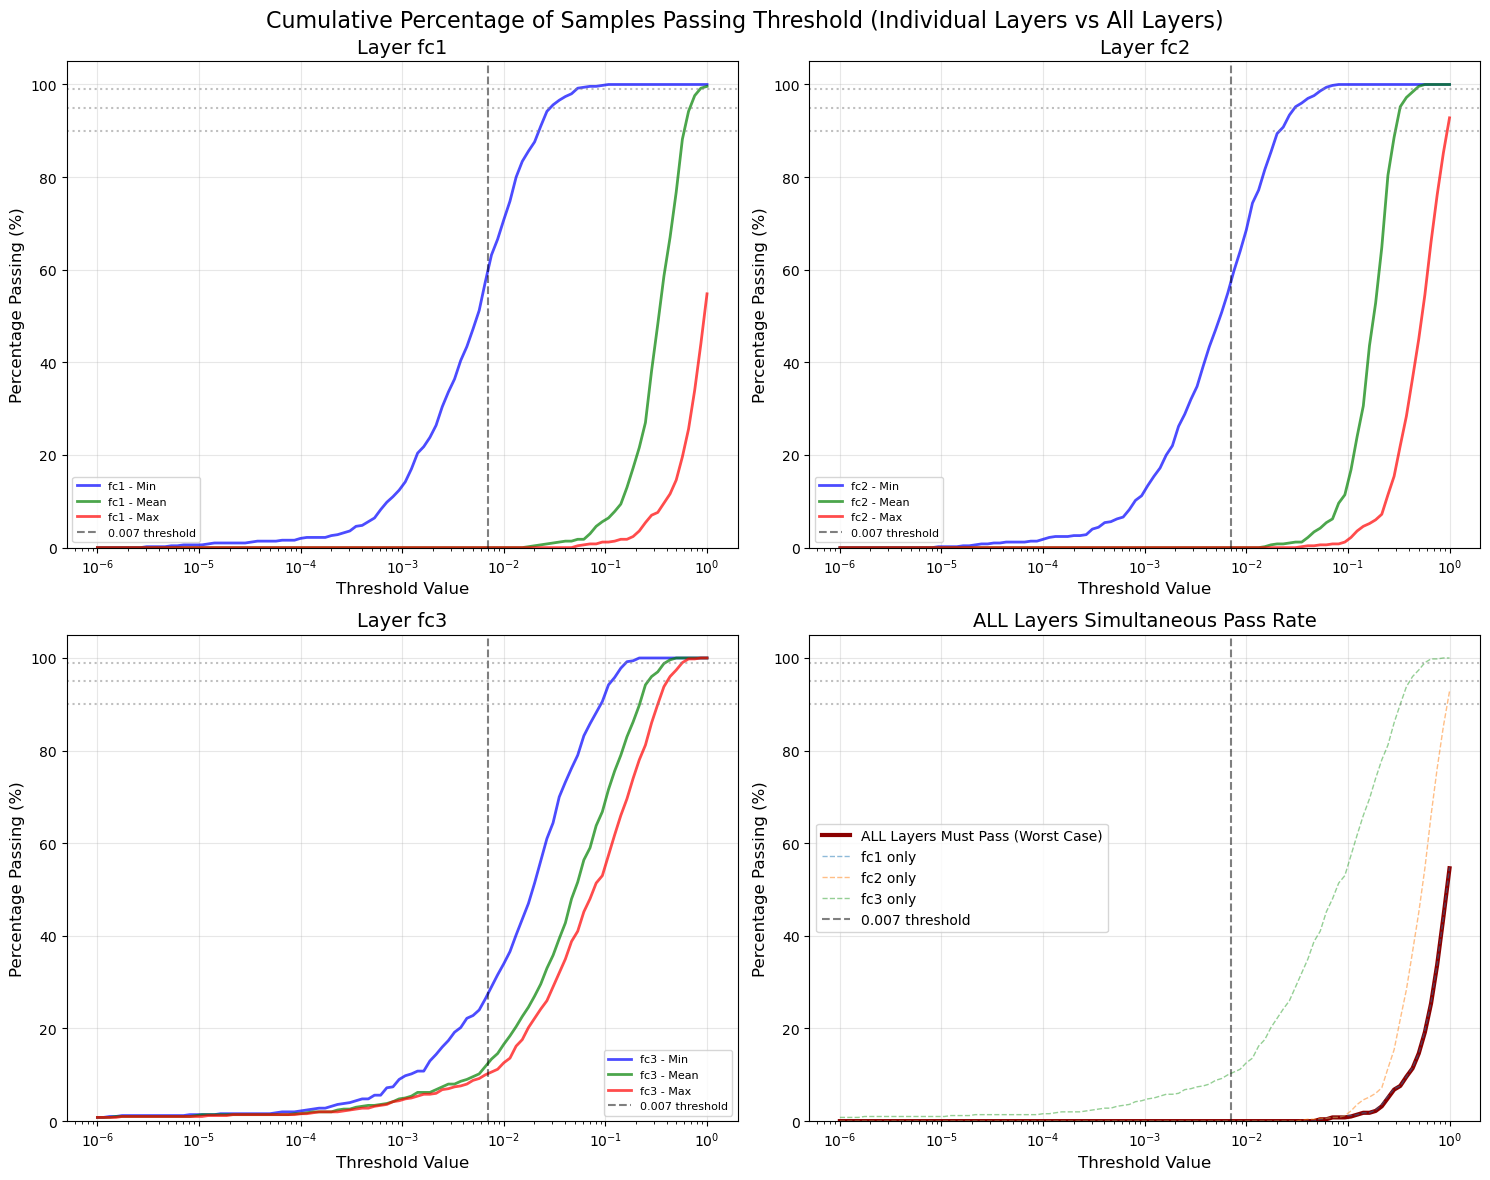


Threshold Analysis Table (Including ALL LAYERS Requirement):
     Layer  Threshold Min Pass % Mean Pass % Max Pass %
       fc1      0.001      13.6%        0.0%       0.0%
       fc1      0.005      47.6%        0.0%       0.0%
       fc1      0.007      60.4%        0.0%       0.0%
       fc1      0.010      70.8%        0.0%       0.0%
       fc1      0.050      98.2%        1.6%       0.2%
       fc1      0.100      99.8%        5.6%       1.2%
       fc2      0.001      12.4%        0.0%       0.0%
       fc2      0.005      47.2%        0.0%       0.0%
       fc2      0.007      56.8%        0.0%       0.0%
       fc2      0.010      68.6%        0.0%       0.0%
       fc2      0.050      98.0%        4.2%       0.4%
       fc2      0.100     100.0%       13.4%       1.8%
       fc3      0.001       9.2%        4.8%       4.6%
       fc3      0.005      22.8%        9.6%       8.8%
       fc3      0.007      27.4%       12.4%      10.0%
       fc3      0.010      34.0%       16.

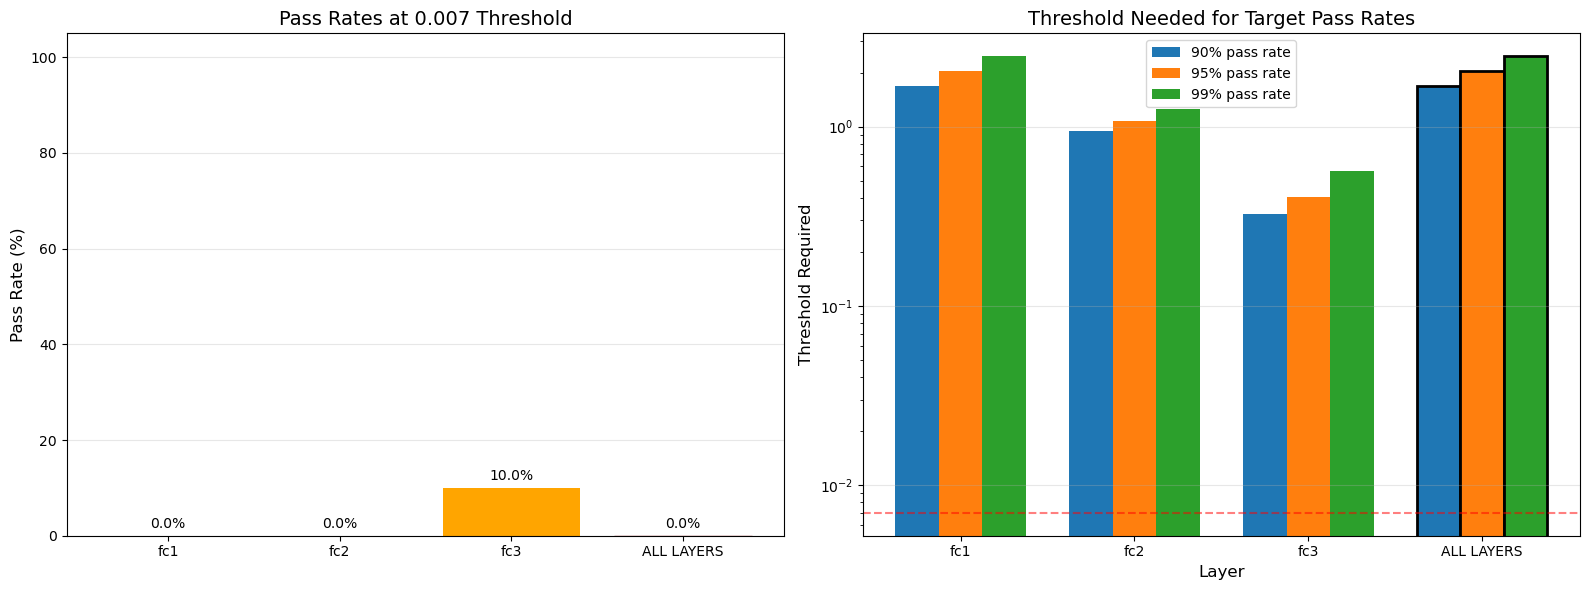

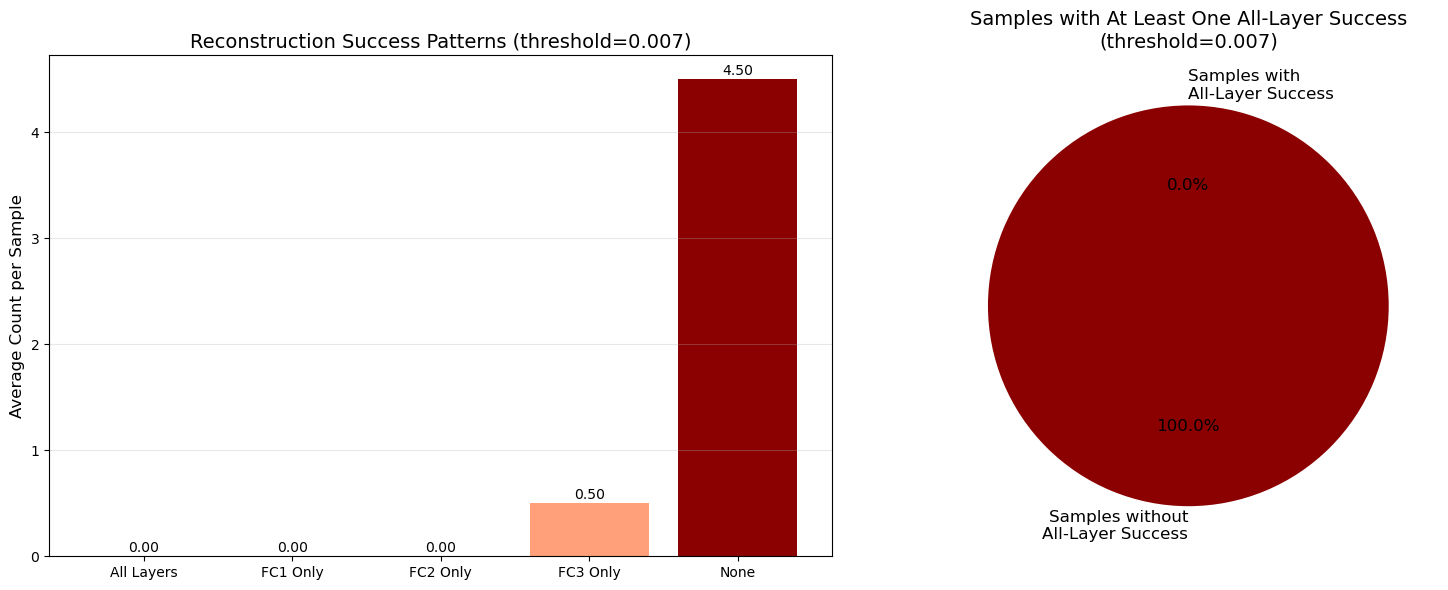


ALL LAYERS SIMULTANEOUS RECONSTRUCTION ANALYSIS

Summary Statistics for Threshold Selection (ALL LAYERS MUST PASS):
------------------------------------------------------------

Threshold needed for target pass rates:
  90% pass rate: 1.684951
  95% pass rate: 2.044051
  99% pass rate: 2.474307
  99.9% pass rate: 3.422445


Pass rates at specific thresholds:
----------------------------------------
  Threshold 0.001: 0.0% pass rate
  Threshold 0.005: 0.0% pass rate
  Threshold 0.007: 0.0% pass rate
  Threshold 0.01: 0.0% pass rate
  Threshold 0.05: 0.2% pass rate
  Threshold 0.1: 0.8% pass rate


Comparison: Individual Layer vs All Layers (at 0.007 threshold):
------------------------------------------------------------
  fc1 alone: 0.0%
  fc2 alone: 0.0%
  fc3 alone: 10.0%
  ALL layers simultaneously: 0.0%

  Reduction when requiring all layers: 100.0%


In [ ]:
# %%
# Generate activation difference data with ALL LAYERS CHECK
def generate_activation_differences_all_layers(model, X_data, n_samples=100, n_reconstructions=5):

    results = []
    layers = ['fc1', 'fc2', 'fc3']
    
    for sample_idx in tqdm(range(min(n_samples, len(X_data))), desc="Processing samples"):
        original_input = X_data[sample_idx]
        
        # Get original activations
        original_activations = {}
        hooks = []
        for layer in layers:
            hooks.append(getattr(model, layer).register_forward_hook(
                get_activation(layer, original_activations)
            ))
        
        model.eval()
        with torch.no_grad():
            original_output = model(original_input.unsqueeze(0))
        
        for hook in hooks:
            hook.remove()
        
        # Multiple reconstruction attempts
        for recon_idx in range(n_reconstructions):
            # Reconstruct input
            reconstructed_input = torch.randn(1, 4, requires_grad=True)
            optimizer = optim.Adam([reconstructed_input], lr=0.01)
            
            for _ in range(500):
                optimizer.zero_grad()
                output = model(reconstructed_input)
                loss = nn.functional.mse_loss(output, original_output)
                loss.backward()
                optimizer.step()
            
            # Get reconstructed activations
            reconstructed_activations = {}
            hooks = []
            for layer in layers:
                hooks.append(getattr(model, layer).register_forward_hook(
                    get_activation(layer, reconstructed_activations)
                ))
            
            with torch.no_grad():
                _ = model(reconstructed_input)
            
            for hook in hooks:
                hook.remove()
            
            # Calculate differences for each layer
            row = {'sample_idx': sample_idx, 'reconstruction_idx': recon_idx}
            
            # Store individual layer metrics
            all_layer_max_diffs = []
            for layer in layers:
                orig_act = original_activations[layer].flatten()
                recon_act = reconstructed_activations[layer].flatten()
                
                abs_diff = torch.abs(orig_act - recon_act)
                
                row[f'{layer}_min_abs_diff'] = abs_diff.min().item()
                row[f'{layer}_mean_abs_diff'] = abs_diff.mean().item()
                row[f'{layer}_max_abs_diff'] = abs_diff.max().item()
                
                all_layer_max_diffs.append(abs_diff.max().item())
            
            # CRITICAL: Store the maximum difference across ALL layers
            row['all_layers_max_diff'] = max(all_layer_max_diffs)
            
            # Also store minimum of the maximums (best case scenario across layers)
            row['all_layers_min_of_max'] = min(all_layer_max_diffs)
            
            results.append(row)
    
    return pd.DataFrame(results)

# %%
# Generate results
print("Generating activation differences with all-layer checks...")
results = generate_activation_differences_all_layers(model, X_train, n_samples=100, n_reconstructions=5)

# Save results
results.to_csv('activation_diff_results_all_layers.csv', index=False)
print(f"Results saved. Shape: {results.shape}")

# %%
# Define threshold values to test
thresholds = np.logspace(-6, 0, 100)  # From 1e-6 to 1 (0.000001 to 1)

# Create figure for cumulative distribution INCLUDING ALL-LAYERS CHECK
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cumulative Percentage of Samples Passing Threshold (Individual Layers vs All Layers)', fontsize=16)

layers = ['fc1', 'fc2', 'fc3']
metrics = ['min_abs_diff', 'mean_abs_diff', 'max_abs_diff']
colors = {'min_abs_diff': 'blue', 'mean_abs_diff': 'green', 'max_abs_diff': 'red'}

# Plot for each layer
for idx, layer in enumerate(layers):
    ax = axes[idx//2, idx%2]
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate percentage passing each threshold
        percentages = []
        for threshold in thresholds:
            passing = np.sum(values <= threshold) / len(values) * 100
            percentages.append(passing)
        
        # Plot cumulative distribution
        ax.semilogx(thresholds, percentages, 
                   label=f'{layer} - {metric.replace("_abs_diff", "").capitalize()}',
                   color=colors[metric], linewidth=2, alpha=0.7)
    
    # Add reference lines
    ax.axvline(x=0.007, color='black', linestyle='--', alpha=0.5, label='0.007 threshold')
    ax.axhline(y=90, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=95, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=99, color='gray', linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Threshold Value', fontsize=12)
    ax.set_ylabel('Percentage Passing (%)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 105)

# CRITICAL: Plot ALL LAYERS simultaneous check
ax = axes[1, 1]

# Plot the all-layers maximum (worst case - ALL must pass)
values = results['all_layers_max_diff'].values
percentages_all = []
for threshold in thresholds:
    passing = np.sum(values <= threshold) / len(values) * 100
    percentages_all.append(passing)

ax.semilogx(thresholds, percentages_all, 
           label='ALL Layers Must Pass (Worst Case)',
           color='darkred', linewidth=3)

# Also plot individual layer maximums for comparison
for layer in layers:
    values = results[f'{layer}_max_abs_diff'].values
    percentages = []
    for threshold in thresholds:
        passing = np.sum(values <= threshold) / len(values) * 100
        percentages.append(passing)
    ax.semilogx(thresholds, percentages, 
               label=f'{layer} only',
               linewidth=1, alpha=0.5, linestyle='--')

ax.axvline(x=0.007, color='black', linestyle='--', alpha=0.5, label='0.007 threshold')
ax.axhline(y=90, color='gray', linestyle=':', alpha=0.5)
ax.axhline(y=95, color='gray', linestyle=':', alpha=0.5)
ax.axhline(y=99, color='gray', linestyle=':', alpha=0.5)

ax.set_xlabel('Threshold Value', fontsize=12)
ax.set_ylabel('Percentage Passing (%)', fontsize=12)
ax.set_title('ALL Layers Simultaneous Pass Rate', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('cumulative_threshold_all_layers.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create detailed threshold analysis table INCLUDING ALL-LAYERS
threshold_values = [0.001, 0.005, 0.007, 0.01, 0.05, 0.1]
analysis_results = []

# Individual layer analysis
for layer in layers:
    for threshold in threshold_values:
        row = {'Layer': layer, 'Threshold': threshold}
        
        for metric in metrics:
            column = f'{layer}_{metric}'
            values = results[column].values
            passing_percentage = np.sum(values <= threshold) / len(values) * 100
            row[f'{metric.replace("_abs_diff", "").capitalize()} Pass %'] = f'{passing_percentage:.1f}%'
        
        analysis_results.append(row)

# ALL LAYERS analysis
for threshold in threshold_values:
    row = {'Layer': 'ALL LAYERS', 'Threshold': threshold}
    
    # Check if ALL layers pass simultaneously
    values = results['all_layers_max_diff'].values
    passing_percentage = np.sum(values <= threshold) / len(values) * 100
    row['Min Pass %'] = '-'
    row['Mean Pass %'] = '-'
    row['Max Pass %'] = f'{passing_percentage:.1f}%'
    
    analysis_results.append(row)

# Create DataFrame and display
threshold_df = pd.DataFrame(analysis_results)
print("\nThreshold Analysis Table (Including ALL LAYERS Requirement):")
print("="*80)
print(threshold_df.to_string(index=False))

# Save to CSV
threshold_df.to_csv('threshold_analysis_all_layers.csv', index=False)

# %%
# Create comparison visualization: Individual vs All Layers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Pass rates at 0.007 threshold
threshold_007 = 0.007
pass_rates_007 = {}

for layer in layers:
    values = results[f'{layer}_max_abs_diff'].values
    pass_rates_007[layer] = np.sum(values <= threshold_007) / len(values) * 100

# All layers
values = results['all_layers_max_diff'].values
pass_rates_007['ALL LAYERS'] = np.sum(values <= threshold_007) / len(values) * 100

# Plot
keys = list(pass_rates_007.keys())
values = list(pass_rates_007.values())
bars = ax1.bar(keys, values, color=['blue', 'green', 'orange', 'darkred'])

# Color the ALL LAYERS bar differently
bars[-1].set_color('darkred')
bars[-1].set_alpha(0.8)

ax1.set_ylabel('Pass Rate (%)', fontsize=12)
ax1.set_title('Pass Rates at 0.007 Threshold', fontsize=14)
ax1.set_ylim(0, 105)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{value:.1f}%', ha='center', va='bottom')

# Right plot: Threshold needed for different pass rates
target_pass_rates = [90, 95, 99]
threshold_needed = {rate: {} for rate in target_pass_rates}

for rate in target_pass_rates:
    # Individual layers
    for layer in layers:
        values = results[f'{layer}_max_abs_diff'].values
        threshold_needed[rate][layer] = np.percentile(values, rate)
    
    # All layers
    values = results['all_layers_max_diff'].values
    threshold_needed[rate]['ALL LAYERS'] = np.percentile(values, rate)

# Plot
x = np.arange(len(keys))
width = 0.25

for i, rate in enumerate(target_pass_rates):
    values = [threshold_needed[rate][k] for k in keys]
    bars = ax2.bar(x + i*width, values, width, label=f'{rate}% pass rate')
    
    # Highlight ALL LAYERS
    bars[-1].set_edgecolor('black')
    bars[-1].set_linewidth(2)

ax2.set_xlabel('Layer', fontsize=12)
ax2.set_ylabel('Threshold Required', fontsize=12)
ax2.set_title('Threshold Needed for Target Pass Rates', fontsize=14)
ax2.set_xticks(x + width)
ax2.set_xticklabels(keys)
ax2.legend()
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')

# Add 0.007 reference line
ax2.axhline(y=0.007, color='red', linestyle='--', alpha=0.5, label='0.007 threshold')

plt.tight_layout()
plt.savefig('individual_vs_all_layers_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Analyze reconstruction success patterns
def analyze_reconstruction_patterns(results, threshold=0.007):
    """Analyze which reconstructions succeed for all layers simultaneously"""
    
    # Group by sample
    grouped = results.groupby('sample_idx')
    
    success_patterns = []
    
    for sample_idx, group in grouped:
        sample_data = {
            'sample_idx': sample_idx,
            'total_reconstructions': len(group),
            'all_layers_pass': 0,
            'fc1_only_pass': 0,
            'fc2_only_pass': 0,
            'fc3_only_pass': 0,
            'none_pass': 0
        }
        
        for _, row in group.iterrows():
            fc1_pass = row['fc1_max_abs_diff'] <= threshold
            fc2_pass = row['fc2_max_abs_diff'] <= threshold
            fc3_pass = row['fc3_max_abs_diff'] <= threshold
            all_pass = row['all_layers_max_diff'] <= threshold
            
            if all_pass:
                sample_data['all_layers_pass'] += 1
            elif fc1_pass and not fc2_pass and not fc3_pass:
                sample_data['fc1_only_pass'] += 1
            elif fc2_pass and not fc1_pass and not fc3_pass:
                sample_data['fc2_only_pass'] += 1
            elif fc3_pass and not fc1_pass and not fc2_pass:
                sample_data['fc3_only_pass'] += 1
            else:
                sample_data['none_pass'] += 1
        
        success_patterns.append(sample_data)
    
    return pd.DataFrame(success_patterns)

# %%
# Analyze patterns
pattern_df = analyze_reconstruction_patterns(results, threshold=0.007)

# Visualize patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Distribution of success types
success_types = ['all_layers_pass', 'fc1_only_pass', 'fc2_only_pass', 'fc3_only_pass', 'none_pass']
mean_counts = [pattern_df[col].mean() for col in success_types]
labels = ['All Layers', 'FC1 Only', 'FC2 Only', 'FC3 Only', 'None']

bars = ax1.bar(labels, mean_counts, color=['darkgreen', 'lightblue', 'lightgreen', 'lightsalmon', 'darkred'])
ax1.set_ylabel('Average Count per Sample', fontsize=12)
ax1.set_title('Reconstruction Success Patterns (threshold=0.007)', fontsize=14)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, mean_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.2f}', ha='center', va='bottom')

# Right: Percentage of samples with at least one successful all-layer reconstruction
samples_with_success = (pattern_df['all_layers_pass'] > 0).sum()
total_samples = len(pattern_df)
success_percentage = samples_with_success / total_samples * 100

categories = ['Samples with\nAll-Layer Success', 'Samples without\nAll-Layer Success']
values = [samples_with_success, total_samples - samples_with_success]
colors = ['darkgreen', 'darkred']

wedges, texts, autotexts = ax2.pie(values, labels=categories, colors=colors, autopct='%1.1f%%',
                                    startangle=90, textprops={'fontsize': 12})
ax2.set_title(f'Samples with At Least One All-Layer Success\n(threshold={threshold_007})', fontsize=14)

plt.tight_layout()
plt.savefig('reconstruction_success_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Summary statistics for ALL LAYERS requirement
print("\n" + "="*80)
print("ALL LAYERS SIMULTANEOUS RECONSTRUCTION ANALYSIS")
print("="*80)

print("\nSummary Statistics for Threshold Selection (ALL LAYERS MUST PASS):")
print("-"*60)

values = results['all_layers_max_diff'].values

# Find threshold for different pass rates
pass_rates = [90, 95, 99, 99.9]
print("\nThreshold needed for target pass rates:")

for rate in pass_rates:
    threshold_for_rate = np.percentile(values, rate)
    print(f"  {rate}% pass rate: {threshold_for_rate:.6f}")

# Statistics at specific thresholds
print("\n\nPass rates at specific thresholds:")
print("-"*40)

for threshold in threshold_values:
    pass_rate = np.sum(values <= threshold) / len(values) * 100
    print(f"  Threshold {threshold}: {pass_rate:.1f}% pass rate")

# Compare with individual layers
print("\n\nComparison: Individual Layer vs All Layers (at 0.007 threshold):")
print("-"*60)

for layer in layers:
    individual_values = results[f'{layer}_max_abs_diff'].values
    individual_pass_rate = np.sum(individual_values <= 0.007) / len(individual_values) * 100
    print(f"  {layer} alone: {individual_pass_rate:.1f}%")

all_layers_pass_rate = np.sum(values <= 0.007) / len(values) * 100
print(f"  ALL layers simultaneously: {all_layers_pass_rate:.1f}%")

reduction = 100 - (all_layers_pass_rate / np.mean([np.sum(results[f'{layer}_max_abs_diff'].values <= 0.007) / len(results) * 100 for layer in layers]) * 100)
print(f"\n  Reduction when requiring all layers: {reduction:.1f}%")
